In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

from bgflow import IterativeSampler, SamplerStep, MCMCStep, SamplerState, GaussianProposal
import tqdm
from src.energies.lennardjones_energy import LennardJonesEnergy, lennard_jones_energy_torch
from bgflow import  IterativeSampler, SamplerState, MCMCStep

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Target Distribution

In [4]:
n_particles = 13
spatial_dim = 3
dimensionality = spatial_dim * n_particles

In [15]:
samples[0.7].shape

(200000, 39)

In [8]:
import numpy as np
import glob

from collections import defaultdict
T = 1
noise_std = 0.2

samples = defaultdict(list)


temps = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.5, 2.0, 3.0, 4.0]
#temps = [0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0]
for i in range(1, 121):
    temp_idx = (i - 1) // 10
    temp = temps[temp_idx]
    path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v22_{i}.npy"

    # try catch permission error

    files = sorted(glob.glob(path_pattern))
    # print(f"Found {len(files)} files for temperature {temp}")
    arrays = []
    for file in files:
        try :
            arrays.append(np.load(file))
        except PermissionError:
            print(f"Permission error for file {file}")
            break

    s = np.concatenate(arrays, axis=0)
    s = s.reshape(-1, dimensionality)
    samples[temp].append(s)

for temp in temps:
    print(temp)
    if len(samples[temp]) == 0:
        continue
    samples[temp] = np.concatenate(samples[temp], axis=0)
    print(f"Samples at {temp} has shape: {samples[temp].shape}")


    idxs = np.random.permutation(samples[temp].shape[0])
    train_idx = idxs[:10000]
    val_idx = idxs[10000: 20000]
    test_idx = idxs[20000: 30000]


    samples_train = samples[temp][train_idx]
    samples_val = samples[temp][val_idx]
    samples_test = samples[temp][test_idx]

    # if directory does not exist, create it
    import os
    temp = temp.__float__()
    data_path = f"../../data/LJ13_Alex_temp_{temp}"
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    else:
        print(f"Directory {data_path} already exists. Overwriting data.")

    np.save(data_path + f"/train_split_LJ13-1000.npy", samples_train)
    np.save(data_path + f"/val_split_LJ13-1000.npy", samples_val)
    np.save(data_path + f"/test_split_LJ13-1000.npy", samples_test)
    print(f"Saved data for temperature {temp} to {data_path}")

0.4
Samples at 0.4 has shape: (200000, 39)
Directory ../../data/LJ13_Alex_temp_0.4 already exists. Overwriting data.
Saved data for temperature 0.4 to ../../data/LJ13_Alex_temp_0.4
0.5
Samples at 0.5 has shape: (200000, 39)
Directory ../../data/LJ13_Alex_temp_0.5 already exists. Overwriting data.
Saved data for temperature 0.5 to ../../data/LJ13_Alex_temp_0.5
0.6
Samples at 0.6 has shape: (200000, 39)
Directory ../../data/LJ13_Alex_temp_0.6 already exists. Overwriting data.
Saved data for temperature 0.6 to ../../data/LJ13_Alex_temp_0.6
0.7
Samples at 0.7 has shape: (200000, 39)
Directory ../../data/LJ13_Alex_temp_0.7 already exists. Overwriting data.
Saved data for temperature 0.7 to ../../data/LJ13_Alex_temp_0.7
0.8
Samples at 0.8 has shape: (200000, 39)
Directory ../../data/LJ13_Alex_temp_0.8 already exists. Overwriting data.
Saved data for temperature 0.8 to ../../data/LJ13_Alex_temp_0.8
0.9
Samples at 0.9 has shape: (200000, 39)
Directory ../../data/LJ13_Alex_temp_0.9 already exis

In [5]:
import numpy as np
import glob

from collections import defaultdict
T = 1
noise_std = 0.2

samples = defaultdict(list)

# for temp in [2]:
#     path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v8_{temp}*"
# temps = [0.6, 0.5, 0.4, 0.3, 0.2]
#temps = [0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0]
temps = [1.2, 1.5]
for temp in temps:
    path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v23_{temp}*"

    # try catch permission error

    files = sorted(glob.glob(path_pattern))
    print(f"Found {len(files)} files for temperature {temp}")
    arrays = []
    for file in files:
        try :
            arrays.append(np.load(file))
        except PermissionError:
            print(f"Permission error for file {file}")
            break

    samples = np.concatenate(arrays)
    print(f"Concatenated array shape: {samples.shape}")
    samples = samples.reshape(-1, dimensionality)


    idxs = np.random.permutation(samples.shape[0])
    train_idx = idxs[:10000]
    val_idx = idxs[10000: 20000]
    test_idx = idxs[20000: 30000]


    samples_train = samples[train_idx]
    samples_val = samples[val_idx]
    samples_test = samples[test_idx]

    # if directory does not exist, create it
    import os
    temp = temp.__float__()
    data_path = f"../../data/LJ13_temp_{temp}"
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    else:
        print(f"Directory {data_path} already exists. Overwriting data.")

    np.save(data_path + f"/train_split_LJ13-1000.npy", samples_train)
    np.save(data_path + f"/val_split_LJ13-1000.npy", samples_val)
    np.save(data_path + f"/test_split_LJ13-1000.npy", samples_test)
    print(f"Saved data for temperature {temp} to {data_path}")


Found 10 files for temperature 1.2
Concatenated array shape: (200000, 39)
Saved data for temperature 1.2 to ../../data/LJ13_temp_1.2
Found 10 files for temperature 1.5
Concatenated array shape: (200000, 39)
Saved data for temperature 1.5 to ../../data/LJ13_temp_1.5


In [61]:
samples.shape

(400000, 39)

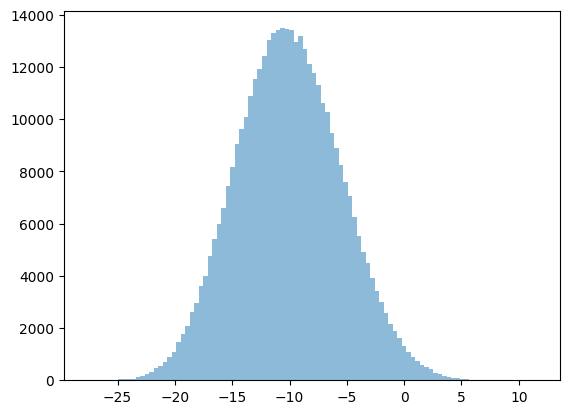

In [66]:
plt.hist(-target_temp2(torch.tensor(samples)), bins=100, alpha=0.5, label="target");

In [62]:
# import numpy as np
# import glob

# T = 4
# noise_std = 0.05

# samples = {}

# for noise_std in [0.1]:
#     # path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v7_{temp}*"
#     path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_{noise_std}_noise_{T}*"
#     path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_v4_{T}*"
    
#     # Find all matching files
#     files = sorted(glob.glob(path_pattern))

#     arrays = [np.load(file) for file in files]
#     s = np.concatenate(arrays, axis=0)

#     print(f"Concatenated array shape: {s.shape}")
#     # samples = torch.tensor(samples, dtype=torch.float32).to(device)
#     s = s.reshape(-1, dimensionality)
#     samples[noise_std] = s

# # Set the prefix and axis for concatenation
# # path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_v4_{T}*"
# # path_pattern = f"/home/mila/t/tara.akhoundsadegh/scratch/lj13_samples/samples_{noise_std}_noise_{T}*"
# # path_pattern = f"/network/scratch/a/alexander.tong/lj13_samples/samples_v7_{T}*"

In [9]:
T = 2
T = T.__float__()
target = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=T
    )


target_temp1 = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=1.0
    )

In [10]:
model_samples_path = "/home/mila/t/tara.akhoundsadegh/feynman-kac-diffusion/runner/dem/logs/eval/multiruns/2025-01-23_02-07-27/2/samples_temperature_1.0_8192.pt"

model_samples = torch.load(model_samples_path)


model_samples_path = "/home/mila/t/tara.akhoundsadegh/feynman-kac-diffusion/runner/dem/logs/eval/multiruns/2025-01-23_15-29-19/2/samples_temperature_1.0_8192.pt"


model_samples_not_resampled = torch.load(model_samples_path)

model_hightemp_samples_path = "/home/mila/t/tara.akhoundsadegh/feynman-kac-diffusion/runner/dem/logs/eval/multiruns/2025-01-23_02-07-27/2/samples_temperature_2.0_8192.pt"

model_hightemp_samples = torch.load(model_hightemp_samples_path)

/tmp/ipykernel_2658091/1126910096.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_samples = torch.load(model_samples_path)
/tmp/ipykernel_2658091/1126910096.py:9: 

In [11]:
target_temp2 = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=2.0
    )

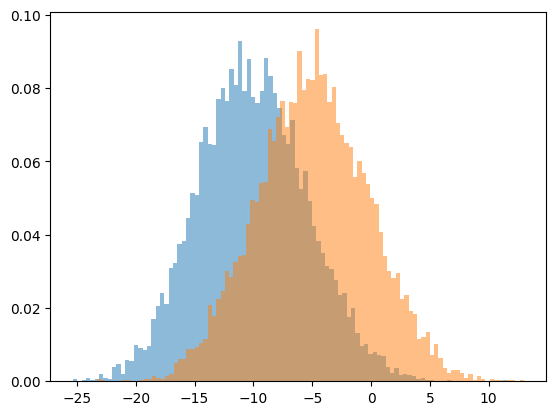

In [12]:
# plt.hist(target(target.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=4");
plt.hist(-target_temp2(target_temp2.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=3", density=True);
# plt.hist(-target_temp1(model_samples).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=1", density=True);
plt.hist(-target_temp2(model_hightemp_samples).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=1", density=True);

In [55]:
target_temp2(model_hightemp_samples).min(), target_temp2(model_hightemp_samples).max()

(tensor(-12.9979, device='cuda:0'), tensor(23.3333, device='cuda:0'))

In [38]:
target_temp1(target_temp1.test_set).min()

tensor(18.1942, device='cuda:0')

In [14]:
model_samples_masked = model_samples[target_temp1(model_samples) > 10]
model_samples_not_resampled_masked = model_samples_not_resampled[target_temp1(model_samples_not_resampled) > 10]

In [61]:
model_samples_masked.shape

torch.Size([8000, 39])

In [62]:
model_samples_not_resampled_masked.shape

torch.Size([8000, 39])

In [48]:
mask = (target_temp1(model_samples) < 10)

In [49]:
mask.sum()

tensor(192, device='cuda:0')

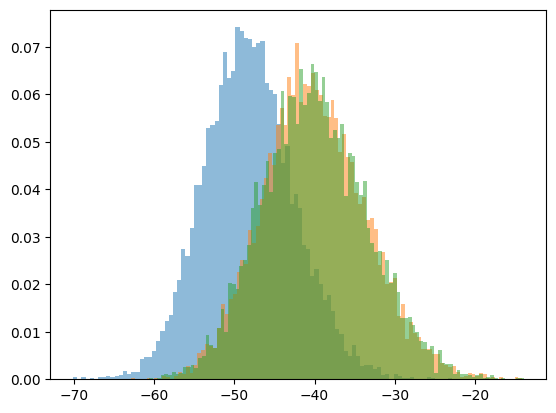

In [15]:
# plt.hist(target(target.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=4");
plt.hist(-target_temp1(target_temp1.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=3", density=True);
# plt.hist(-target_temp1(model_samples).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=1", density=True);
plt.hist(-target_temp1(model_samples_masked).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=1", density=True);
plt.hist(-target_temp1(model_samples_not_resampled_masked).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=1", density=True);

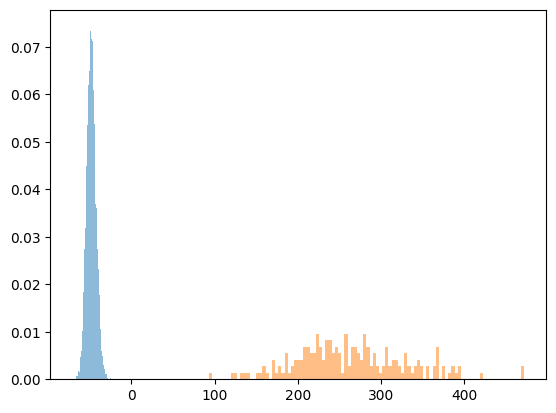

In [32]:
# plt.hist(target(target.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=4");
plt.hist(-target_temp1(target_temp1.test_set).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=3", density=True);
# plt.hist(-target_temp1(model_samples).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=1", density=True);
plt.hist(-target_temp1(model_samples_masked).detach().cpu().numpy(), bins=100, alpha=0.5, label="T=1", density=True);


In [16]:
T = 0.7
T = T.__float__()
target = LennardJonesEnergy(
    dimensionality=dimensionality,
    n_particles=n_particles,
    device=device,
    data_path= "../../data/",
    smooth=False,
    temperature=T
    )

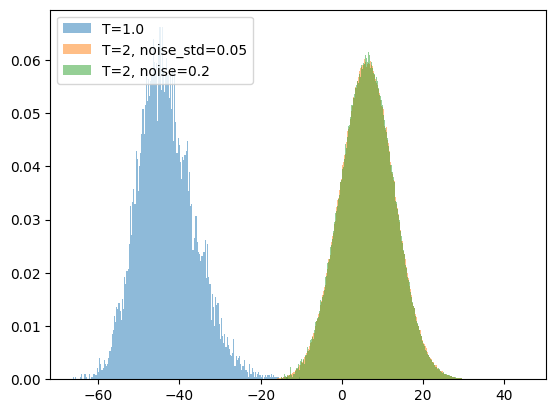

In [54]:
#plt.hist(-target(target.test_set).cpu().detach().numpy(), bins=200, alpha=0.5, density=True)
# 
plt.hist(-target_temp1(target_temp1.test_set).cpu().detach().numpy(), bins=200, alpha=0.5, density=True, label="T=1.0")
samples_energy = target(torch.tensor(samples[0.05], dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=300, density=True, alpha=0.5, label=f"T=2, noise_std=0.05");

samples_energy = target(torch.tensor(samples[0.2], dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=300, density=True, alpha=0.5, label=f"T=2, noise=0.2");


# samples_energy = target(torch.tensor(samples[4], dtype=torch.float32).to(device)).cpu().detach().numpy()
# plt.hist(-samples_energy, bins=300, density=True, alpha=0.5, label=f"T=4");

plt.legend()
plt.show()

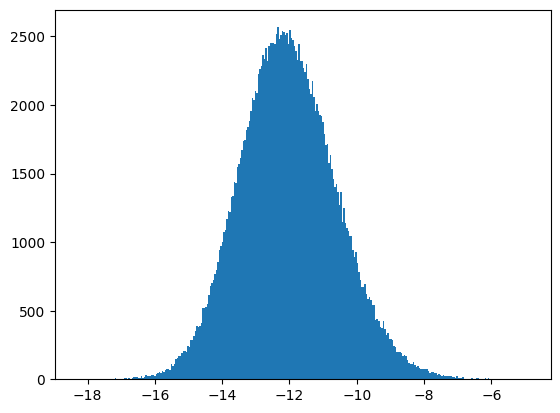

In [8]:
samples_energy = target(torch.tensor(samples, dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=300);
# plt.xlim(-80, 40)

In [8]:
samples_energy.mean()

np.float32(-6.2010493)

In [9]:
samples_energy.mean()

np.float32(-6.2010493)

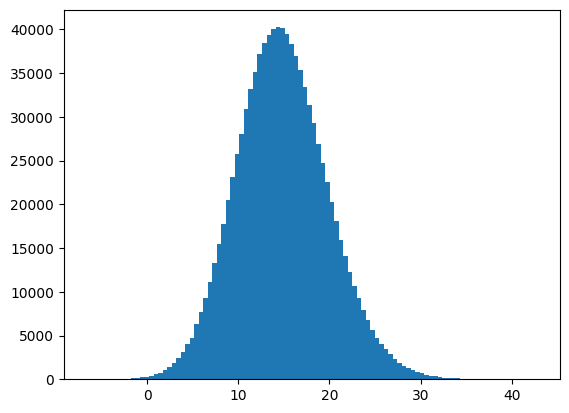

In [22]:
samples_energy = target(torch.tensor(samples, dtype=torch.float32).to(device)).cpu().detach().numpy()
plt.hist(-samples_energy, bins=100);


In [10]:
# randomly generate idices for train, val and test
idxs = np.random.permutation(samples.shape[0])
train_idx = idxs[:100000]
val_idx = idxs[100000:110000]
test_idx = idxs[110000:120000]

In [11]:
samples_train = samples[train_idx]
samples_val = samples[val_idx]
samples_test = samples[test_idx]

In [12]:
samples_train = samples[train_idx]
samples_val = samples[val_idx]
samples_test = samples[test_idx]

# if directory does not exist, create it
import os
if not os.path.exists(f"../../data/LJ13_temp_{T}"):
    os.makedirs(f"../../data/LJ13_temp_{T}")

np.save(f"../../data/LJ13_temp_{T}/train_split_LJ13-1000.npy", samples_train)
np.save(f"../../data/LJ13_temp_{T}/val_split_LJ13-1000.npy", samples_val)
np.save(f"../../data/LJ13_temp_{T}/test_split_LJ13-1000.npy", samples_test)

In [13]:
target(samples).mean()

target(samples).std()

tensor(4.5715, device='cuda:0')

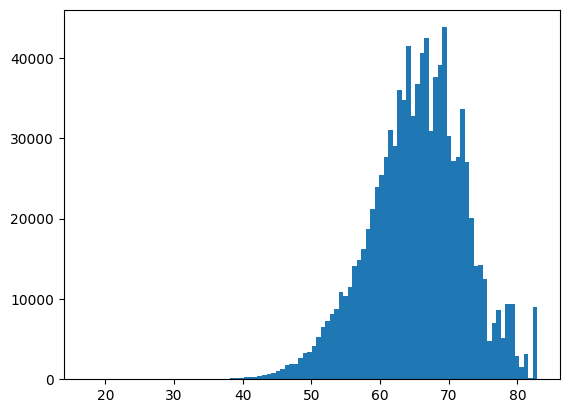

In [18]:
plt.hist(target(samples).detach().cpu().numpy(), bins=100);

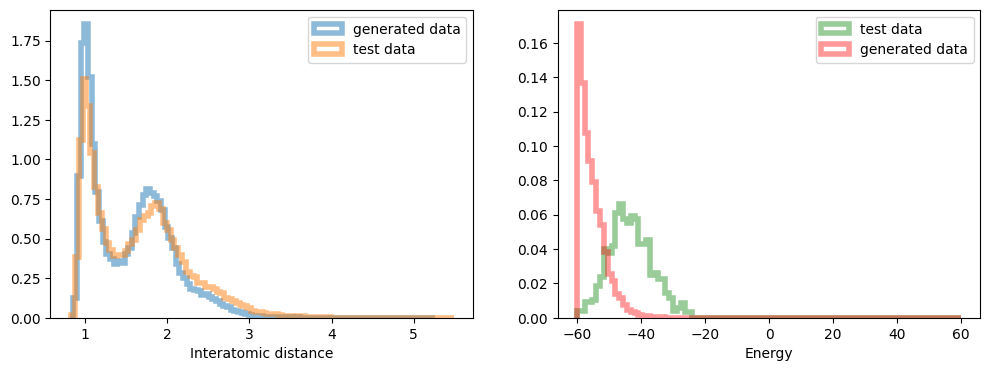

In [19]:
target.get_dataset_fig(samples, T=1.0, T_og=T);

In [6]:
data_path = "/home/mila/t/tara.akhoundsadegh/feynman-kac-diffusion/runner/dem/logs/eval/multiruns/2025-01-20_18-44-52/0/samples_8192.pt"
samples = torch.load(data_path)

/tmp/ipykernel_3640602/4049315480.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  samples = torch.load(data_path)


In [7]:
mask = target(samples).detach().cpu().numpy() <-100

In [8]:
samples = samples[~mask]

In [17]:
s = s.reshape(-1, 39)

In [26]:
mask = target(s).detach().cpu().numpy() <-100
s = s[~mask]

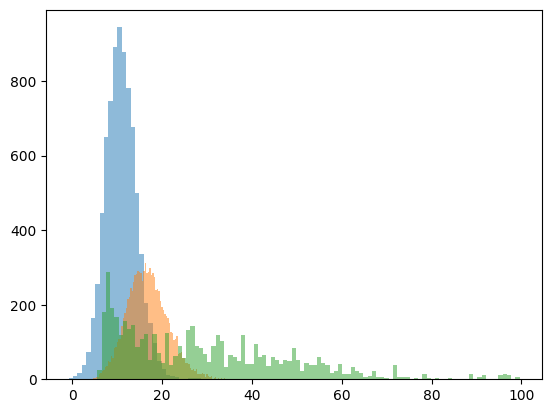

In [27]:
plt.hist(-target(samples).detach().cpu().numpy(), bins=100, alpha=0.5);
plt.hist(-target(target.test_set).detach().cpu().numpy(), bins=100,  alpha=0.5);
plt.hist(-target(s[:5000]).detach().cpu().numpy(), bins=100, alpha=0.5);

In [11]:
from src.energies.lennardjones_energy import LennardJonesPotential

energy = LennardJonesPotential(dim=39, n_particles=13, two_event_dims=True)

n_samples = 500
n_burnin = 10

# sampler_state = SamplerState(samples=[torch.randn(n_samples, 1, 13, 3)])
sampler_state = SamplerState(samples=samples.reshape(-1, 1, 13, 3)[:500])
mcmc_step = MCMCStep(energy,
                     proposal=GaussianProposal(noise_std=0.1),
                     target_temperatures=4.0)
sampler = IterativeSampler(sampler_state,
                           sampler_steps=[mcmc_step],
                           stride=100,
                           n_burnin=n_burnin,
                           progress_bar=tqdm.tqdm,
                           return_hook=lambda samples: [samples[0][:,0]])

100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


In [14]:
s = _

In [12]:
sampler.sample(n_samples)

100%|██████████| 500/500 [12:12<00:00,  1.46s/it]


tensor([[[[-1.6665e+00,  1.9954e+00,  1.2231e+00],
          [ 5.1645e-01, -2.2807e-01, -3.9126e+00],
          [ 1.7816e+00,  3.4912e+00,  7.4698e-01],
          ...,
          [-4.1651e-02,  4.9208e-01,  4.2690e-01],
          [-6.4348e-01,  4.1625e+00, -1.2480e+00],
          [ 2.6971e-01,  2.3093e+00,  1.3558e+00]],

         [[ 1.3644e+00,  5.5303e-01,  3.5495e+00],
          [ 1.4198e-01,  2.6719e+00, -2.9936e+00],
          [-1.3808e+00,  1.6080e+00, -2.3813e+00],
          ...,
          [ 3.1690e+00,  4.4463e+00, -1.4118e+00],
          [ 3.1289e+00, -4.8106e+00, -2.7063e+00],
          [ 1.0892e+00, -1.8767e+00, -9.3912e-01]],

         [[-2.1691e+00, -1.6375e+00,  2.6207e+00],
          [-5.6925e-01,  2.1540e+00, -1.2778e+00],
          [-5.2161e-01,  2.8676e+00,  2.8170e-01],
          ...,
          [ 3.5087e+00,  4.1531e+00,  2.0741e+00],
          [-8.3371e-01,  3.4034e+00, -9.3672e-01],
          [ 4.8981e-01, -8.6689e-02, -1.8994e+00]],

         ...,

         [[-1.32